<a href="https://colab.research.google.com/github/camachoitzel/All-Python-codes-of-ZTM-course-by-Andrei-Neagoie/blob/master/CSE176_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE176 Introduction to Machine Learning - Project



Run this first before any other code blocks

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy.io as sio
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Part 1 - Binary classification using logistic regression and random forests

Marian and Javier

Classify 4 and 9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Dataset - MNISTmini digits
# Load MNISTmini
data = sio.loadmat('/content/drive/MyDrive/CSE176_ProjectFiles/MNISTmini.mat')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Separate data for training and testing
X_training = data['train_fea1']
y_training = data['train_gnd1'].ravel()
X_testing  = data['test_fea1']
y_testing  = data['test_gnd1'].ravel()


In [ ]:
# split up the data set
X_validation = X_testing[:1000] # 2nd thousand
y_validation = y_testing[:1000]

X_test_final = X_testing[1000:] # last thousand
y_test_final = y_testing[1000:]

# their shape
print("Training:", X_training.shape)
print("Validation:", X_validation.shape)
print("Testing:", X_test_final.shape)


Training: (60000, 100)
Validation: (1000, 100)
Testing: (9000, 100)


In [ ]:
our_digits = [4, 9]
#filter only 4 and 9
training_mask = np.isin(y_training, our_digits)
validation_mask = np.isin(y_validation, our_digits)
testing_mask= np.isin(y_test_final, our_digits)

X_training = X_training[training_mask]
y_training = y_training[training_mask]

X_validation = X_validation[validation_mask]
y_validation = y_validation[validation_mask]

X_testing = X_test_final[testing_mask]
y_testing = y_test_final[testing_mask]

In [ ]:
# 4 is 0 and 9 is 1
y_training = (y_training == 9).astype(int)
y_validation   = (y_validation == 9).astype(int)
y_testing  = (y_testing == 9).astype(int)


In [ ]:
#logistic regression ...

logreg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Hyperparameter C
param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100]}
logreg_cv = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, scoring='accuracy',n_jobs=-1)

# cross validate

print("training...")
logreg_cv.fit(X_training, y_training)
print("done training.")


training


In [ ]:
print("Best C found by CV:", logreg_cv.best_params_['C'])
print("Best CV accuracy on training set:", logreg_cv.best_score_)

logreg_best = logreg_cv.best_estimator_

# predict
y_training_pred_logreg = logreg_best.predict(X_training)
y_validation_pred_logreg   = logreg_best.predict(X_validation)
y_testing_pred_logreg  = logreg_best.predict(X_testing)

# accuracy
training_acc_logreg = accuracy_score(y_training, y_training_pred_logreg)
validation_acc_logreg   = accuracy_score(y_validation,   y_validation_pred_logreg)
testing_acc_logreg  = accuracy_score(y_testing,  y_testing_pred_logreg)

print("Performance")
print("Training accuracy: ", training_acc_logreg)
print("Validation accuracy: ", validation_acc_logreg)
print("Testing accuracy: ", testing_acc_logreg)

In [ ]:
# random forest



Binary Classification for

# Part 2 - MNIST multiclass classification with XGBoost
Itzel and Anvi

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import data from drive
mnist_pixel = sio.loadmat('/content/drive/MyDrive/CSE176_ProjectFiles/MNIST.mat')
mnist_lenet = sio.loadmat('/content/drive/MyDrive/CSE176_ProjectFiles/MNIST-LeNet5.mat')

Load the data and verify what is in the dataset and what is in training set after set up


In [ ]:

print("Keys in MNIST.mat:", mnist_pixel.keys())

# get the training and test data
X_train = mnist_pixel['train_fea']
y_train = mnist_pixel['train_gnd'].ravel()
X_test = mnist_pixel['test_fea']
y_test = mnist_pixel['test_gnd'].ravel()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Number of classes:", len(np.unique(y_train)))

# split training data into train and validation
# using 5000 for validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=5000, random_state=42)

print("Train size:", len(X_tr))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


Keys in MNIST.mat: dict_keys(['__header__', '__version__', '__globals__', 'train_fea', 'train_gnd', 'test_fea', 'test_gnd'])
Training data shape: (60000, 784)
Test data shape: (10000, 784)
Number of classes: 10
Train size: 55000
Validation size: 5000
Test size: 10000


Train model

In [ ]:
# create xgboost model
# starting with 100 trees
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, random_state=42)

# Adjust labels to be 0-indexed for XGBoost
y_tr_adjusted = y_tr - 1
y_val_adjusted = y_val - 1
y_test_adjusted = y_test - 1

print("Training model...")
model.fit(X_tr, y_tr_adjusted)

# check accuracy on each set
train_acc = model.score(X_tr, y_tr_adjusted)
val_acc = model.score(X_val, y_val_adjusted)
test_acc = model.score(X_test, y_test_adjusted)

print("Train accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)
print("Test error:", (1-test_acc)*100, "%")

Training model...
Train accuracy: 1.0
Validation accuracy: 0.9796
Test accuracy: 0.9784
Test error: 2.1599999999999953 %


Test different number of trees


In [ ]:
num_trees = [50, 100, 200, 500, 1000, 1500]

# lists to store the errors
train_errors = []
val_errors = []
test_errors = []

# try each number
for n in num_trees:
    print("Trying", n, "trees...")

    # make model with n trees
    model = xgb.XGBClassifier(n_estimators=n, max_depth=6, random_state=42)
    model.fit(X_tr, y_tr_adjusted)

    # calculate errors
    train_err = (1 - model.score(X_tr, y_tr_adjusted)) * 100
    val_err = (1 - model.score(X_val, y_val_adjusted)) * 100
    test_err = (1 - model.score(X_test, y_test_adjusted )) * 100

    # save the errors
    train_errors.append(train_err)
    val_errors.append(val_err)
    test_errors.append(test_err)

    print("  Test error:", test_err, "%")

# find the best number of trees
best_idx = val_errors.index(min(val_errors))
best_num_trees = num_trees[best_idx]
print("\nBest number of trees:", best_num_trees)
print("Best validation error:", val_errors[best_idx], "%")

Trying 50 trees...
  Test error: 2.610000000000001 %
Trying 100 trees...
  Test error: 2.1599999999999953 %
Trying 200 trees...
  Test error: 2.0499999999999963 %
Trying 500 trees...
  Test error: 2.0100000000000007 %
Trying 1000 trees...
  Test error: 1.9399999999999973 %
Trying 1500 trees...
  Test error: 1.959999999999995 %

Best number of trees: 500
Best validation error: 1.8399999999999972 %


Create Plot


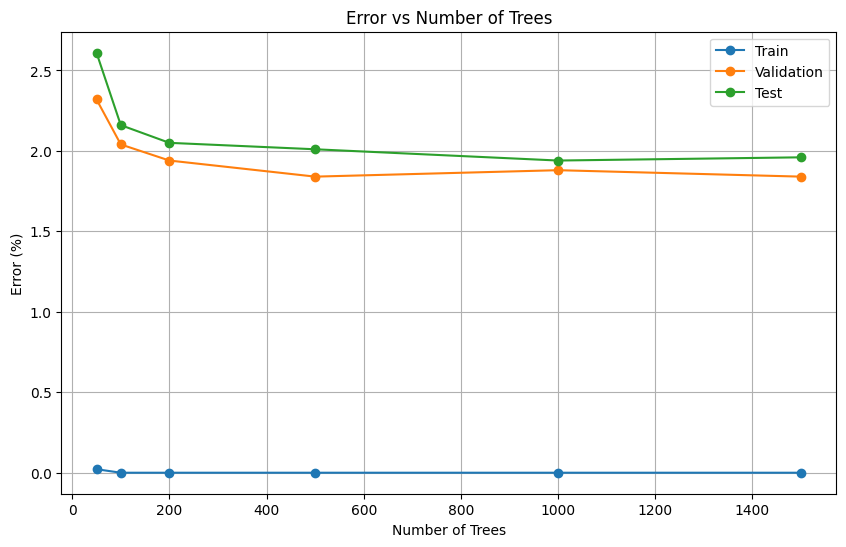

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(num_trees, train_errors, marker='o', label='Train')
plt.plot(num_trees, val_errors, marker='o', label='Validation')
plt.plot(num_trees, test_errors, marker='o', label='Test')
plt.xlabel('Number of Trees')
plt.ylabel('Error (%)')
plt.title('Error vs Number of Trees')
plt.legend()
plt.grid(True)
plt.savefig('error_plot_pixel.pdf')
plt.show()

Train final model with best number of trees found earlier

In [ ]:
print("Training final model with", best_num_trees, "trees")

final_model = xgb.XGBClassifier(n_estimators=best_num_trees, max_depth=6, random_state=42)
final_model.fit(X_train, y_train - 1)

# get final test accuracy
final_test_acc = final_model.score(X_test, y_test_adjusted)
final_test_err = (1 - final_test_acc) * 100

print("\nFINAL RESULTS:")
print("Test error:", final_test_err, "%")
print("Number of trees:", best_num_trees)
print("Max depth: 6")

Training final model with 500 trees

FINAL RESULTS:
Test error: 1.9399999999999973 %
Number of trees: 500
Max depth: 6


Make confusion matrix

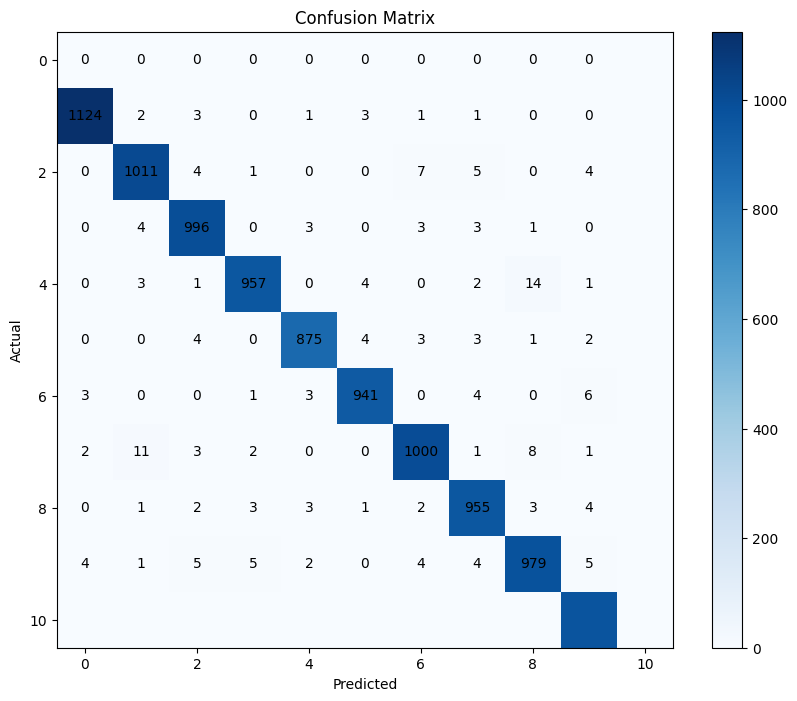

In [ ]:
# get predictions
predictions = final_model.predict(X_test)

# make confusion matrix
cm = confusion_matrix(y_test, predictions)

# plot it
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# add numbers to the plot
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

plt.savefig('confusion_matrix_pixel.pdf')
plt.show()

Download results


In [ ]:
# download the results
from google.colab import files

# save results to text file
f = open('results_pixel.txt', 'w')
f.write('test error ' + str(round(final_test_err, 2)) + '%, ' + str(best_num_trees) + ' trees, maximum depth 6\n')
f.close()

# download everything
files.download('error_plot_pixel.pdf')
files.download('confusion_matrix_pixel.pdf')
files.download('results_pixel.txt')

print("Downloaded!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded!


In [ ]:
import pickle
from google.colab import files

# Save model to send to TA
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save a small text file with the key results
with open("xgb_results.txt", "w") as f:
    f.write(f"test error {final_test_err:.2f}%\n")
    f.write(f"{best_num_trees} trees\n")
    f.write("maximum depth 6\n")

# Download the files
files.download('xgb_model.pkl')
files.download('xgb_results.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Use LeNet5


In [ ]:
#load and split data
# LeNet5 features are stored similarly to the pixel features
X_train_lenet = mnist_lenet['train_fea']   # shape: (60000, 800)
y_train_lenet = mnist_lenet['train_gnd'].ravel()
X_test_lenet  = mnist_lenet['test_fea']    # shape: (10000, 800)
y_test_lenet  = mnist_lenet['test_gnd'].ravel()

print("LeNet5 Training data shape:", X_train_lenet.shape)
print("LeNet5 Test data shape:", X_test_lenet.shape)
print("Number of classes (LeNet5):", len(np.unique(y_train_lenet)))

# split training into train and validation
X_tr_lenet, X_val_lenet, y_tr_lenet, y_val_lenet = train_test_split(
    X_train_lenet, y_train_lenet, test_size=5000, random_state=42
)

print("LeNet5 Train size:", len(X_tr_lenet))
print("LeNet5 Validation size:", len(X_val_lenet))
print("LeNet5 Test size:", len(X_test_lenet))

# adjust labels to be 0–9 instead of 1–10
y_tr_lenet_adj   = y_tr_lenet - 1
y_val_lenet_adj  = y_val_lenet - 1
y_test_lenet_adj = y_test_lenet - 1


LeNet5 Training data shape: (60000, 800)
LeNet5 Test data shape: (10000, 800)
Number of classes (LeNet5): 10
LeNet5 Train size: 55000
LeNet5 Validation size: 5000
LeNet5 Test size: 10000


In [ ]:
#XGBoost with diff numbers of trees

num_trees_lenet = [50, 100, 200, 500, 1000, 1500]

train_errors_lenet = []
val_errors_lenet = []
test_errors_lenet = []

for n in num_trees_lenet:
    print("LeNet5 – trying", n, "trees...")

    model_lenet = xgb.XGBClassifier(
        n_estimators=n,
        max_depth=6,          # keep same depth as pixel model
        random_state=42,
        n_jobs=-1
    )

    model_lenet.fit(X_tr_lenet, y_tr_lenet_adj)

    train_err = (1 - model_lenet.score(X_tr_lenet,  y_tr_lenet_adj))  * 100
    val_err   = (1 - model_lenet.score(X_val_lenet, y_val_lenet_adj)) * 100
    test_err  = (1 - model_lenet.score(X_test_lenet, y_test_lenet_adj)) * 100

    train_errors_lenet.append(train_err)
    val_errors_lenet.append(val_err)
    test_errors_lenet.append(test_err)

    print(f"  Train error: {train_err:.2f}%")
    print(f"  Val error:   {val_err:.2f}%")
    print(f"  Test error:  {test_err:.2f}%")

# pick best number of trees based on validation error
best_idx_lenet = val_errors_lenet.index(min(val_errors_lenet))
best_num_trees_lenet = num_trees_lenet[best_idx_lenet]

print("\n[LeNet5] Best number of trees:", best_num_trees_lenet)
print("[LeNet5] Best validation error:", val_errors_lenet[best_idx_lenet], "%")


LeNet5 – trying 50 trees...
  Train error: 0.00%
  Val error:   1.22%
  Test error:  1.21%
LeNet5 – trying 100 trees...
  Train error: 0.00%
  Val error:   1.08%
  Test error:  1.10%
LeNet5 – trying 200 trees...
  Train error: 0.00%
  Val error:   1.10%
  Test error:  1.08%
LeNet5 – trying 500 trees...
  Train error: 0.00%
  Val error:   1.00%
  Test error:  1.07%
LeNet5 – trying 1000 trees...
  Train error: 0.00%
  Val error:   1.00%
  Test error:  1.04%
LeNet5 – trying 1500 trees...
  Train error: 0.00%
  Val error:   1.00%
  Test error:  1.01%

[LeNet5] Best number of trees: 500
[LeNet5] Best validation error: 1.0000000000000009 %


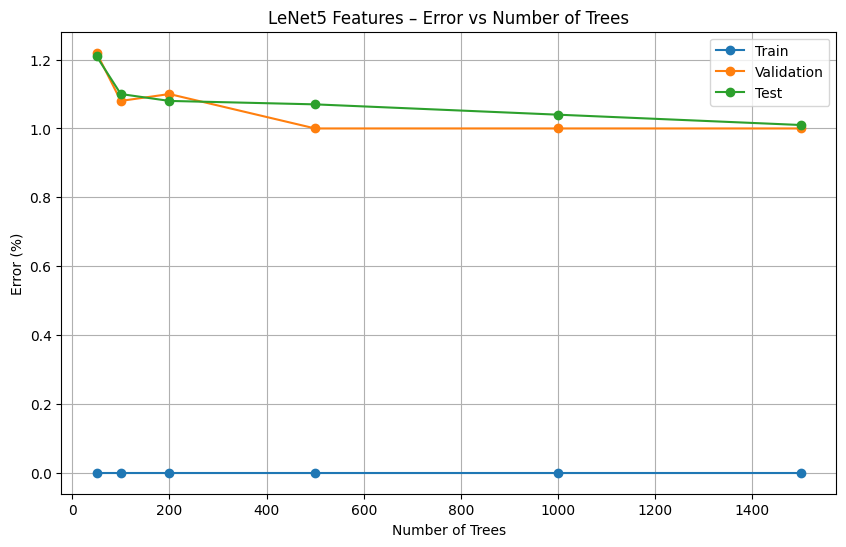

In [ ]:
# ===== LeNet5: plot error vs number of trees =====

plt.figure(figsize=(10, 6))
plt.plot(num_trees_lenet, train_errors_lenet, marker='o', label='Train')
plt.plot(num_trees_lenet, val_errors_lenet,   marker='o', label='Validation')
plt.plot(num_trees_lenet, test_errors_lenet,  marker='o', label='Test')

plt.xlabel('Number of Trees')
plt.ylabel('Error (%)')
plt.title('LeNet5 Features – Error vs Number of Trees')
plt.legend()
plt.grid(True)

# save plot for report / TA submission
plt.savefig('error_plot_lenet.pdf')
plt.show()


In [ ]:
# train final model with best number of trees

print("Training final LeNet5 model with", best_num_trees_lenet, "trees")

final_model_lenet = xgb.XGBClassifier(
    n_estimators=best_num_trees_lenet,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# train on full training set (all 60k images), labels 0–9
final_model_lenet.fit(X_train_lenet, y_train_lenet - 1)

# evaluate on test set
final_test_acc_lenet = final_model_lenet.score(X_test_lenet, y_test_lenet_adj)
final_test_err_lenet = (1 - final_test_acc_lenet) * 100

print("\n[LeNet5 FINAL RESULTS]")
print("Test accuracy:", final_test_acc_lenet)
print("Test error:", final_test_err_lenet, "%")
print("Number of trees:", best_num_trees_lenet)
print("Max depth: 6")


In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

# predictions on test set (labels are already 0–9 in y_test_lenet_adj)
predictions_lenet = final_model_lenet.predict(X_test_lenet)

cm_lenet = confusion_matrix(y_test_lenet_adj, predictions_lenet)

plt.figure(figsize=(10, 8))
plt.imshow(cm_lenet, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – LeNet5 Features')

# add counts on each cell
for i in range(cm_lenet.shape[0]):
    for j in range(cm_lenet.shape[1]):
        plt.text(j, i, str(cm_lenet[i, j]),
                 ha='center', va='center')

plt.tight_layout()
plt.savefig('confusion_matrix_lenet.pdf')
plt.show()


In [ ]:
import pickle

# save model to send to TA
with open("xgb_lenet_model.pkl", "wb") as f:
    pickle.dump(final_model_lenet, f)

# save a small text file with the key results
with open("lenet_results.txt", "w") as f:
    f.write(f"test error {final_test_err_lenet:.2f}%\n")
    f.write(f"{best_num_trees_lenet} trees\n")
    f.write("maximum depth 6\n")


# Part 3
Same as part 1 and 2 but with our dataset

Classification:
NASA: Asteroids Classification
Marian and Javier

Regression:
Achieved Frames per Second (FPS) in Video Games
Itzel and Anvi

In [ ]:
#classification

import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimehta/nasa-asteroids-classification")

print("Path to dataset files:", path)

100%|██████████| 3.27M/3.27M [00:01<00:00, 2.77MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shrutimehta/nasa-asteroids-classification/versions/1


We will perform binary classification on asteroid data.

0 is Non-hazardous and 1 is Hazardous

In [ ]:
# what is in this data?
import pandas as pd

df = pd.read_csv(path + "/nasa.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [ ]:
# cleaning data, drop features that aren't helpful
drop = ["Neo Reference ID", "Name", "Close Approach Date", "Orbit Determination Date", "Equinox", "Est Dia in M(min)", "Est Dia in M(max)", "Est Dia in Miles(min)", "Est Dia in Miles(max)",
    "Est Dia in Feet(min)", "Est Dia in Feet(max)", "Relative Velocity km per hr", "Miles per hour","Miss Dist.(Astronomical)", "Miss Dist.(lunar)", "Miss Dist.(miles)"]

df_clean = df.drop(columns=[c for c in drop if c in df.columns])

# Hazardous bool into int
df_clean["Hazardous"] = df_clean["Hazardous"].astype(int)

# orbiting body is categories, not strings, so use code numbers for them (we need to use numbers)
df_clean["Orbiting Body"] = df_clean["Orbiting Body"].astype("category").cat.codes

df_clean.head()
df_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Epoch Date Close Approach     4687 non-null   int64  
 4   Relative Velocity km per sec  4687 non-null   float64
 5   Miss Dist.(kilometers)        4687 non-null   float64
 6   Orbiting Body                 4687 non-null   int8   
 7   Orbit ID                      4687 non-null   int64  
 8   Orbit Uncertainity            4687 non-null   int64  
 9   Minimum Orbit Intersection    4687 non-null   float64
 10  Jupiter Tisserand Invariant   4687 non-null   float64
 11  Epoch Osculation              4687 non-null   float64
 12  Eccentricity                  4687 non-null   float64
 13  Sem

In [ ]:
# features = everything except the label
X = df_clean.drop(columns=["Hazardous"])
y = df_clean["Hazardous"]

print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())
print("Class proportions:\n", y.value_counts(normalize=True))


X shape: (4687, 23)
y value counts:
 Hazardous
0    3932
1     755
Name: count, dtype: int64
Class proportions:
 Hazardous
0    0.838916
1    0.161084
Name: proportion, dtype: float64


# Logistic Regression on Video Game Framerate based on CPU and GPU using LightGBM


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/achieved-frames-per-second-fps-in-video-games")

print("Path to dataset files:", path)

100%|██████████| 4.11M/4.11M [00:01<00:00, 3.27MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/achieved-frames-per-second-fps-in-video-games/versions/1


In [ ]:
import pandas as pd              # For working with data tables (DataFrames)
import numpy as np               # For mathematical operations on arrays
import matplotlib.pyplot as plt  # For creating plots and graphs
import seaborn as sns           # For making visualizations
from sklearn.model_selection import train_test_split  # Split data into train/test
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Regression metrics
import lightgbm as lgb          # The LightGBM library for gradient boosting
import pickle                   # For saving/loading the trained model
import warnings
import os

warnings.filterwarnings('ignore')  # Hide warning messages for cleaner output

In [ ]:
print("\n")
print("LOADING DATA SET")


# Load the CSV file into a pandas DataFrame
dataset_path = f"{path}/fps_videogames.csv"
df = pd.read_csv(dataset_path, low_memory=False)


print(f"\n Dataset loaded successfully!")
print(f"   Total rows: {len(df):,}")
print(f"   Total columns: {df.shape[1]}")

# Show a preview of the data
print("\n First 3 rows of the dataset:")
print(df[['CpuName', 'GpuName', 'GameName', 'GameResolution', 'FPS']].head(3))




LOADING DATA SET

 Dataset loaded successfully!
   Total rows: 425,833
   Total columns: 46

 First 3 rows of the dataset:
              CpuName                         GpuName  \
0   Intel Core i7-920               AMD Radeon RX 480   
1   Intel Core i7-920               AMD Radeon RX 480   
2  Intel Core i5-4690  NVIDIA GeForce GTX 1080 11Gbps   

                       GameName  GameResolution    FPS  
0  counterStrikeGlobalOffensive            1080   70.0  
1  counterStrikeGlobalOffensive            1080  230.0  
2  counterStrikeGlobalOffensive            1080  250.0  


In [ ]:
print("\n")
print("WHAT IS BEING PREDICTED")

print(f"\n Target Variable: FPS (Frames Per Second)")
print(f"\n   Type: Continuous numeric value")
print(f"   Range: {df['FPS'].min():.1f} to {df['FPS'].max():.1f}")
print(f"   Mean: {df['FPS'].mean():.1f}")
print(f"   Median: {df['FPS'].median():.1f}")
print(f"   Standard Deviation: {df['FPS'].std():.1f}")

# Visualize the distribution of FPS values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['FPS'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('FPS (Frames Per Second)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of FPS Values', fontsize=14, fontweight='bold')
plt.axvline(60, color='red', linestyle='--', linewidth=2, label='60 FPS (Playable threshold)')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df['FPS'], vert=True)
plt.ylabel('FPS', fontsize=12)
plt.title('FPS Boxplot (Shows Outliers)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('fps_distribution.png', dpi=300, bbox_inches='tight')
print("\n Saved: fps_distribution.png")
plt.close()



WHAT IS BEING PREDICTED

 Target Variable: FPS (Frames Per Second)

   Type: Continuous numeric value
   Range: 0.0 to 1000.0
   Mean: 138.5
   Median: 120.0
   Standard Deviation: 87.8

 Saved: fps_distribution.png


In [ ]:
print("\n")
print("CLEAN THE DATA")

# Some columns have BOTH numbers and text
# Need to convert these to pure numbers, replacing invalid entries with NaN

def clean_numeric_column(series):

    # Converts a column to numeric, replacing invalid values with NaN.
    # LightGBM needs consistent numeric data types

    return pd.to_numeric(series, errors='coerce')

# These columns have mixed types
mixed_columns = [
    'CpuCacheL3', 'CpuDieSize', 'CpuNumberOfTransistors',
    'GpuBandwidth', 'GpuNumberOfComputeUnits', 'GpuDieSize',
    'GpuFP32Performance', 'GpuMemoryBus', 'GpuMemorySize',
    'GpuOpenCL', 'GpuShaderModel', 'GpuNumberOfShadingUnits',
    'GpuNumberOfTransistors'
]

# Clean each problematic column
for col in mixed_columns:
    if col in df.columns:
        original_dtype = df[col].dtype
        df[col] = clean_numeric_column(df[col])
        print(f" Cleaned {col}: {original_dtype} -> numeric")

print("\n Step 4.2: Removing Outliers")
print("-" * 80)

# Remove FPS values beyond 3 standard deviations from the mean
mean_fps = df['FPS'].mean()
std_fps = df['FPS'].std()
lower_bound = mean_fps - 3 * std_fps
upper_bound = mean_fps + 3 * std_fps

before_outliers = len(df)
df = df[(df['FPS'] >= lower_bound) & (df['FPS'] <= upper_bound)]
after_outliers = len(df)

print(f"  • Original dataset: {before_outliers:,} rows")
print(f"  • Removed {before_outliers - after_outliers:,} outliers")
print(f"  • Remaining: {after_outliers:,} rows")
print(f"  • FPS range kept: {lower_bound:.1f} to {upper_bound:.1f}")



CLEAN THE DATA
 Cleaned CpuCacheL3: float64 -> numeric
 Cleaned CpuDieSize: float64 -> numeric
 Cleaned CpuNumberOfTransistors: float64 -> numeric
 Cleaned GpuBandwidth: float64 -> numeric
 Cleaned GpuNumberOfComputeUnits: float64 -> numeric
 Cleaned GpuDieSize: float64 -> numeric
 Cleaned GpuFP32Performance: float64 -> numeric
 Cleaned GpuMemoryBus: float64 -> numeric
 Cleaned GpuMemorySize: float64 -> numeric
 Cleaned GpuOpenCL: float64 -> numeric
 Cleaned GpuShaderModel: float64 -> numeric
 Cleaned GpuNumberOfShadingUnits: float64 -> numeric
 Cleaned GpuNumberOfTransistors: float64 -> numeric

 Step 4.2: Removing Outliers
--------------------------------------------------------------------------------
  • Original dataset: 422,726 rows
  • Removed 3,768 outliers
  • Remaining: 418,958 rows
  • FPS range kept: -107.7 to 379.1


In [ ]:
print("\n")
print("FEATURE SELECTION")

print("\n Selected Features:")

feature_columns = [
    # === CPU Features ===
    'CpuNumberOfCores',      # More cores = better multitasking
    'CpuNumberOfThreads',    # More threads = better parallel processing
    'CpuFrequency',          # Clock speed in GHz
    'CpuTurboClock',         # Max boost speed
    'CpuCacheL3',            # Cache size (faster data access)

    # === GPU Features ===
    'GpuMemorySize',         # VRAM (crucial for gaming)
    'GpuBoostClock',         # GPU max speed
    'GpuMemoryBus',          # Memory bandwidth
    'GpuNumberOfShadingUnits',  # Parallel processing units
    'GpuNumberOfROPs',       # Render output units
    'GpuTextureRate',        # Texture processing speed
    'GpuPixelRate',          # Pixel processing speed
    'GpuBandwidth',          # Data transfer speed

    # === Game Settings ===
    'GameResolution',        # 1080p, 1440p, 4K, etc.
    'GameSetting'            # Low, Medium, High, Ultra
]

print(f"\n  Total features selected: {len(feature_columns)}")
print("\n  Category breakdown:")
print(f"    • CPU features: 5")
print(f"    • GPU features: 8")
print(f"    • Game settings: 2")



FEATURE SELECTION

 Selected Features:

  Total features selected: 15

  Category breakdown:
    • CPU features: 5
    • GPU features: 8
    • Game settings: 2


In [ ]:
print("\n")
print("HANDLE CATEGORICAL FEATURES")

categorical_features = ['GameResolution', 'GameSetting']

print(f"\nCategorical features: {categorical_features}")
print("\nUnique values before encoding:")
for col in categorical_features:
    print(f"  {col}: {df[col].unique()[:5]}")

# Convert categorical columns to numeric codes
print("\nConverting categorical features to numeric codes...")
for col in categorical_features:
    df[col] = df[col].astype('category').cat.codes

print(f"\nCategorical features converted to numeric codes")
print(f"  GameResolution and GameSetting are now integers")



HANDLE CATEGORICAL FEATURES

Categorical features: ['GameResolution', 'GameSetting']

Unique values before encoding:
  GameResolution: [1 0 2]
  GameSetting: [1 3 0 2]

Converting categorical features to numeric codes...

Categorical features converted to numeric codes
  GameResolution and GameSetting are now integers


In [ ]:
print("\n")
print("PREPARING TRAIN AND TEST SETS")


# Separate features (X) and target (y)
X = df[feature_columns].copy()
y = df['FPS'].copy()  # ← KEY CHANGE: Use actual FPS, not binary class!

print(f"\n Dataset shape:")
print(f"  • Features (X): {X.shape}")
print(f"  • Target (y): {y.shape}")

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% for testing
    random_state=42     # For reproducibility (same split every time)
)

print(f"\n  Data split:")
print(f"  • Training set: {len(X_train):,} samples (70%)")
print(f"  • Test set: {len(X_test):,} samples (30%)")



PREPARING TRAIN AND TEST SETS

 Dataset shape:
  • Features (X): (418958, 15)
  • Target (y): (418958,)

  Data split:
  • Training set: 293,270 samples (70%)
  • Test set: 125,688 samples (30%)


In [ ]:
print("\n")
print("CREATE DATASET")

lgb_train = lgb.Dataset(
    X_train,
    label=y_train,
    categorical_feature=categorical_features,
    free_raw_data=False  # Keep original data for later use
)

lgb_test = lgb.Dataset(
    X_test,
    label=y_test,
    reference=lgb_train,  # Use same encoding as training set
    categorical_feature=categorical_features,
    free_raw_data=False
)

print(" LightGBM datasets created ")



CREATE DATASET
 LightGBM datasets created 


In [ ]:
print("\n")
print("HYPERPARAMETER TUNING")

from sklearn.model_selection import KFold

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63, 127],
    'max_depth': [5, 7, 10]
}

print("\nTesting hyperparameter combinations:")
print(f"  Learning rates: {param_grid['learning_rate']}")
print(f"  Num leaves: {param_grid['num_leaves']}")
print(f"  Max depths: {param_grid['max_depth']}")
print(f"  Total combinations: 27")

best_params = None
best_score = float('inf')  # Start with infinity to minimize error

print("\nStarting tuning process (this will take a few minutes)...")
print("Testing each combination with 3-fold cross-validation...\n")

# Create regular k-fold splitter for regression
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

iteration = 0
for lr in param_grid['learning_rate']:
    for nl in param_grid['num_leaves']:
        for md in param_grid['max_depth']:
            iteration += 1

            # Define parameters for this combination
            params = {
                'objective': 'regression',
                'metric': 'rmse',
                'learning_rate': lr,
                'num_leaves': nl,
                'max_depth': md,
                'feature_fraction': 0.8,
                'bagging_fraction': 0.8,
                'bagging_freq': 5,
                'verbose': -1
            }

            # Train with cross-validation
            # Pass folds = kfold
            cv_results = lgb.cv(
                params,
                lgb_train,
                num_boost_round = 2000,
                folds=kfold,  # Use regular k-fold for regression
                callbacks=[lgb.early_stopping(50)],
                return_cvbooster=False
            )

            # Get the best score
            score = min(cv_results['valid rmse-mean'])

            print(f"  [{iteration}/27] lr={lr}, leaves={nl}, depth={md} -> RMSE: {score:.2f}")

            # Update best parameters if this is better
            if score < best_score:
                best_score = score
                best_params = params.copy()

print(f"\nBest parameters found!")
print(f"  Learning rate: {best_params['learning_rate']}")
print(f"  Num leaves: {best_params['num_leaves']}")
print(f"  Max depth: {best_params['max_depth']}")
print(f"  Best RMSE: {best_score:.2f}")



HYPERPARAMETER TUNING

Testing hyperparameter combinations:
  Learning rates: [0.01, 0.05, 0.1]
  Num leaves: [31, 63, 127]
  Max depths: [5, 7, 10]
  Total combinations: 27

Starting tuning process (this will take a few minutes)...
Testing each combination with 3-fold cross-validation...

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid's rmse: 64.1693 + 0.154998
  [1/27] lr=0.01, leaves=31, depth=5 -> RMSE: 64.17
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid's rmse: 64.0737 + 0.157935
  [2/27] lr=0.01, leaves=31, depth=7 -> RMSE: 64.07
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid's rmse: 64.0397 + 0.158887
  [3/27] lr=0.01, leaves=31, depth=10 -> RMSE: 64.04
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteratio

In [ ]:
print("\n")
print("TRAIN FINAL MODEL")

print("\nTraining final model with best parameters...")

# Create a callback to record training results
evals_result = {}

# Train the final model
final_model = lgb.train(
    best_params,
    lgb_train,
    num_boost_round = 2000,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train', 'test'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=False),
        lgb.log_evaluation(period=100),
        lgb.record_evaluation(evals_result)
    ]
)

print(f"\nTraining complete")
print(f"  Best iteration: {final_model.best_iteration}")
print(f"  Final train RMSE: {evals_result['train']['rmse'][final_model.best_iteration - 1]:.4f}")
print(f"  Final test RMSE: {evals_result['test']['rmse'][final_model.best_iteration - 1]:.4f}")




TRAIN FINAL MODEL

Training final model with best parameters...
[100]	train's rmse: 66.7406	test's rmse: 66.9931
[200]	train's rmse: 64.5642	test's rmse: 64.97
[300]	train's rmse: 64.0191	test's rmse: 64.5194
[400]	train's rmse: 63.7912	test's rmse: 64.365
[500]	train's rmse: 63.6504	test's rmse: 64.2827
[600]	train's rmse: 63.5459	test's rmse: 64.2302
[700]	train's rmse: 63.4641	test's rmse: 64.1955
[800]	train's rmse: 63.3971	test's rmse: 64.1707
[900]	train's rmse: 63.3395	test's rmse: 64.1528
[1000]	train's rmse: 63.2879	test's rmse: 64.1384
[1100]	train's rmse: 63.2437	test's rmse: 64.1259
[1200]	train's rmse: 63.2012	test's rmse: 64.1179
[1300]	train's rmse: 63.1617	test's rmse: 64.1105
[1400]	train's rmse: 63.126	test's rmse: 64.1063
[1500]	train's rmse: 63.0911	test's rmse: 64.1021
[1600]	train's rmse: 63.0594	test's rmse: 64.0987
[1700]	train's rmse: 63.0269	test's rmse: 64.0963
[1800]	train's rmse: 62.996	test's rmse: 64.0934
[1900]	train's rmse: 62.9688	test's rmse: 64.092

In [ ]:
print("\n")
print("EVALUATE MODEL")

# Make predictions on the test set
y_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Test Set Performance:")
print(f"  • RMSE (Root Mean Squared Error): {rmse:.2f} FPS")
print(f"  • MAE (Mean Absolute Error): {mae:.2f} FPS")
print(f"  • R² Score: {r2:.4f}")

# Show some example predictions
print("\n Example predictions:")
print("     Actual FPS  |  Predicted FPS  |  Difference")
print("   " + "-"*50)
for i in range(10):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    diff = abs(actual - predicted)
    print(f"      {actual:6.1f}     |     {predicted:6.1f}      |    {diff:5.1f}")



EVALUATE MODEL

 Test Set Performance:
  • RMSE (Root Mean Squared Error): 64.09 FPS
  • MAE (Mean Absolute Error): 50.14 FPS
  • R² Score: 0.3164

 Example predictions:
     Actual FPS  |  Predicted FPS  |  Difference
   --------------------------------------------------
       220.0     |       97.9      |    122.1
       100.0     |       86.5      |     13.5
        40.0     |       83.7      |     43.7
       110.0     |      134.3      |     24.3
        70.0     |      185.5      |    115.5
        90.0     |       45.9      |     44.1
       220.0     |      119.0      |    101.0
       140.0     |      152.3      |     12.3
        80.0     |      127.9      |     47.9
       140.0     |      132.0      |      8.0


In [ ]:
print("\n")
print("CREATE LEARNING CURVE")

print("\n Creating learning curve...")

# Plot how training and test error change over iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
iterations = range(1, len(evals_result['train']['rmse']) + 1)
plt.plot(iterations, evals_result['train']['rmse'], label='Training RMSE', linewidth=2)
plt.plot(iterations, evals_result['test']['rmse'], label='Test RMSE', linewidth=2)
plt.axvline(final_model.best_iteration, color='red', linestyle='--',
            label=f'Best Iteration ({final_model.best_iteration})', linewidth=2)
plt.xlabel('Number of Trees (Iterations)', fontsize=12)
plt.ylabel('RMSE ', fontsize=12)
plt.title('Learning Curve: Test Error vs Number of Trees', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Plot predictions vs actual values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual FPS', fontsize=12)
plt.ylabel('Predicted FPS', fontsize=12)
plt.title('Predicted vs Actual FPS', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('learning_curve_regression.png', dpi=300, bbox_inches='tight')
print(" Saved: learning_curve_regression.png")
plt.close()



CREATE LEARNING CURVE

 Creating learning curve...
 Saved: learning_curve_regression.png


In [ ]:
print("\n")
print("CREATE RESIDUALS PLOT")

print("\n Creating residuals plot...")

# Residuals = actual - predicted
residuals = y_test - y_pred

plt.figure(figsize=(14, 5))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5, s=20)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted FPS', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Distribution of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals', fontsize=14, fontweight='bold')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.legend()

plt.tight_layout()
plt.savefig('residuals_regression.png', dpi=300, bbox_inches='tight')
print("Saved: residuals_regression.png")
plt.close()



CREATE RESIDUALS PLOT

 Creating residuals plot...
Saved: residuals_regression.png


In [ ]:
print("\n")
print("SAVE THE MODEL")


model_package = {
    'model': final_model,
    'feature_columns': feature_columns,
    'categorical_features': categorical_features,
    'best_iteration': final_model.best_iteration,
    'best_params': best_params,
    'test_rmse': rmse,
    'test_mae': mae,
    'test_r2': r2,
    'training_date': '2024-12-09'
}

# Save with pickle
with open('lightgbm_fps_regression_model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print(" Model saved as: lightgbm_fps_regression_model.pkl")



SAVE THE MODEL
 Model saved as: lightgbm_fps_regression_model.pkl
